# Testing out orthonormalizing data product outputs

In [2]:
import fixr
import lookyloo
from lookyloo.core import get_matching_paths
import pathlib
import datetime
import numpy as np
from astropy.io import fits
from importlib import reload
from matplotlib import pyplot as plt
# my own code
import spark_xrif as sx
reload(sx)
# paths for reference
dark_dir = '/opt/MagAOX/calib/camwfs-dark/'

## TEST Dataset: Beta Pic 

In [3]:
# feq 1800 EM Gain 1 (?)
lab_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_1.000000_-45.000000__T20240402063434863230853.fits'
#freq 1800 EM Gain 600
sky_dark = dark_dir + 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20240402053733137034295.fits'

sx_0326_betaPic_03 = sx.SparkXrif('EFC_beta_pictoris_run_03', 'spark_LAB_1564_2000_25mod_20ld_02amp_45ang',  sky_dark, lab_dark, sx.glob_dir_calib, sx.glob_mask, sx.glob_ref, sky_obs_n = 0)

Number of DATA files:  854016
Number of REF files:  451072
GENERATING REFERENCE
PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 881
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7491323 bytes
  ratio:              0.508

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7491868 bytes
  ratio:              0.508

xrif compres

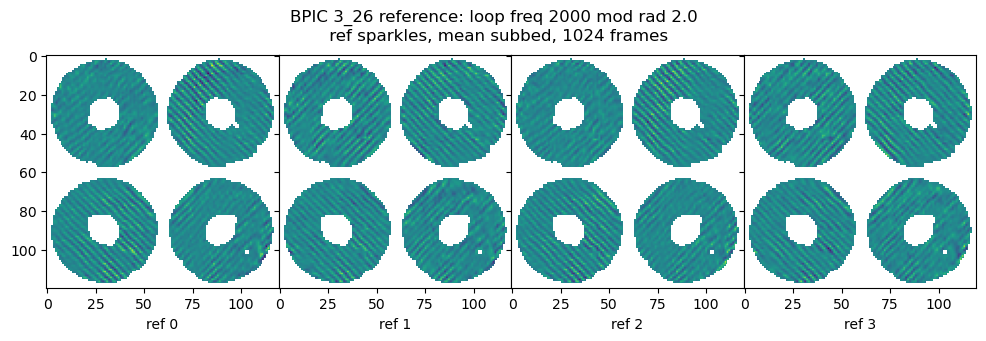

In [4]:
#checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"BPIC 3_26 reference: loop freq 2000 mod rad 2.0 \n ref sparkles, mean subbed, 1024 frames", y=0.90)

lab_ref_data = sx_0326_betaPic_03.labref_norm

for e in range(4):
    axs[e].imshow(lab_ref_data[e]*sx_0326_betaPic_03.mask_nan, label = f'ref {e}', vmax = np.max(lab_ref_data), vmin = np.min(lab_ref_data))
    axs[e].set_xlabel(f"ref {e}")

In [5]:
n_avg = 1000
dot_0326_BP3_avg = sx_0326_betaPic_03.dot_list_pool_avg(n=800000, avg=n_avg)

[0, 4000, 8000, 12000, 16000, 20000, 24000, 28000, 32000, 36000, 40000, 44000, 48000, 52000, 56000, 60000, 64000, 68000, 72000, 76000, 80000, 84000, 88000, 92000, 96000, 100000, 104000, 108000, 112000, 116000, 120000, 124000, 128000, 132000, 136000, 140000, 144000, 148000, 152000, 156000, 160000, 164000, 168000, 172000, 176000, 180000, 184000, 188000, 192000, 196000, 200000, 204000, 208000, 212000, 216000, 220000, 224000, 228000, 232000, 236000, 240000, 244000, 248000, 252000, 256000, 260000, 264000, 268000, 272000, 276000, 280000, 284000, 288000, 292000, 296000, 300000, 304000, 308000, 312000, 316000, 320000, 324000, 328000, 332000, 336000, 340000, 344000, 348000, 352000, 356000, 360000, 364000, 368000, 372000, 376000, 380000, 384000, 388000, 392000, 396000, 400000, 404000, 408000, 412000, 416000, 420000, 424000, 428000, 432000, 436000, 440000, 444000, 448000, 452000, 456000, 460000, 464000, 468000, 472000, 476000, 480000, 484000, 488000, 492000, 496000, 500000, 504000, 508000, 512000

In [6]:
dot_0326_BP3_avg = np.vstack(dot_0326_BP3_avg)

split roll  (800, 4)
split roll  (800, 4)
split roll  (800, 4)
split roll  (800, 4)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

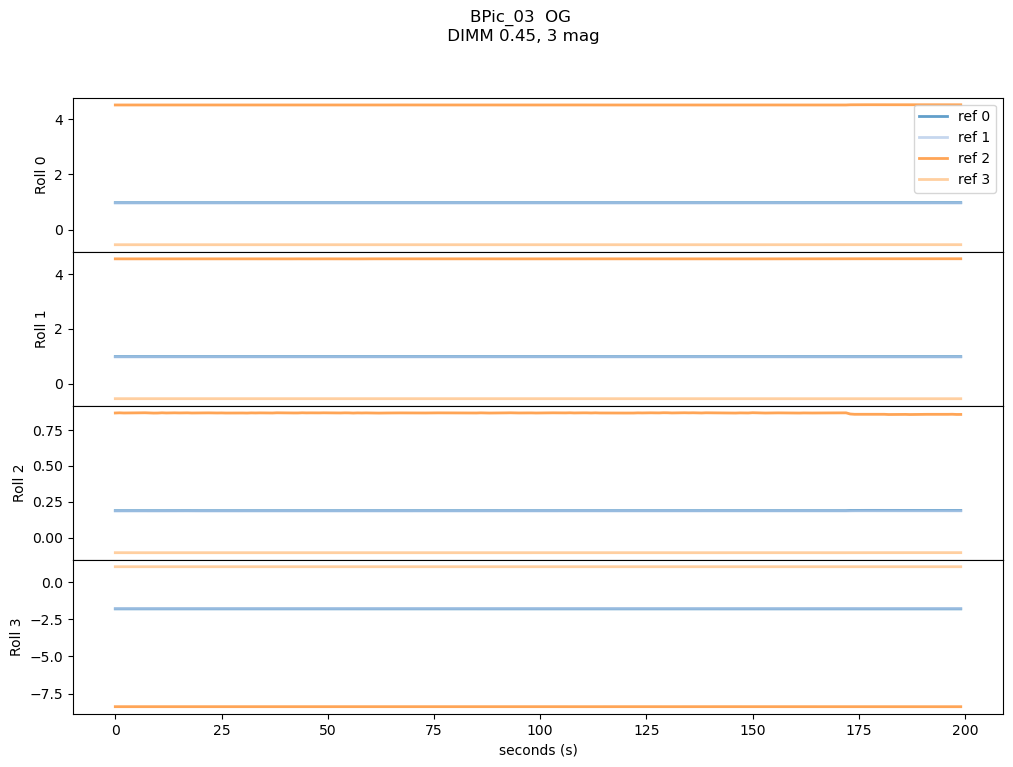

In [7]:
reload(sx)
data_allroll = np.array([sx.split_data_dot_roll(dot_0326_BP3_avg, roll=i) for i in range(4)])
sx.plot_time_series_roll(data_allroll, 'BPic_03  OG \n DIMM 0.45, 3 mag ', ref_avg = sx_0326_betaPic_03.ref_avg, hz=2000/(4*n_avg))